<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import skimage
import random
from skimage import data
from skimage import io
from skimage import feature
from skimage.color import rgb2gray

from PIL import Image
import os
from random import shuffle

In [2]:
file_name = '/Users/arlomalmberg/Documents/GSPP/Semester 2/DS100/final_project/starting_data.pkl'
data_from_nb1 = pd.read_pickle(file_name)

In [3]:
data_from_nb1.head()

,Pictures,Encoding
0,"[[[0.5755203921568448, 0.571598823529394, 0.59...",9
1,"[[[0.4153376906318078, 0.42710239651416076, 0....",9
2,"[[[0.4797385620915048, 0.5424836601307204, 0.5...",9
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
4,"[[[0.4607189542483606, 0.4724836601307136, 0.3...",9


In [4]:
def get_size_statistics(df):
    
    heights = []
    widths = []
    
    for img in df['Pictures']:
        heights.append(img.shape[0])
        widths.append(img.shape[1])
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

In [5]:
get_size_statistics(data_from_nb1)

Average Height: 300.0
Max Height: 300
Min Height: 300


Average Width: 300.0
Max Width: 300
Min Width: 300


In [6]:
def ft0(image):
    return image.size
# Returns the pixel size of the image

def ft1(image):
    reds = []
    for i in range(len(image)):
        reds.append(image[i][0][0])
    return np.mean(reds)
# Returns the average of the red-channel pictures for the images

def ft2(image):
    reds = []
    for i in range(len(image)):
        reds.append(image[i][0][1])
    return np.mean(reds)
# Returns the average of the green-channel pictures for the images

def ft3(image):
    reds = []
    for i in range(len(image)):
        reds.append(image[i][0][2])
    return np.mean(reds)
# Returns the average of the blue-channel pictures for the images

def ft4(image):
    return image.shape[1]/float(image.shape[0])
# Returns the aspect ratio of the image

def ft5(image):
    grayscale = rgb2gray(image)
    return skimage.feature.canny(grayscale)
# Computes Canny edges

def ft6(image, visualize = False):
    grayscale = rgb2gray(image)
    return skimage.feature.daisy(grayscale, visualize = visualize)
# Computes Daisy features

def ft7(image, visualize = False):
    return skimage.feature.hog(image, visualize = visualize)
# Computes HOG flattened vector

In [7]:
subset = data_from_nb1.loc[0:10]

In [8]:
image_1 = subset.loc[0][0]

In [9]:
subset.head()

,Pictures,Encoding
0,"[[[0.5755203921568448, 0.571598823529394, 0.59...",9
1,"[[[0.4153376906318078, 0.42710239651416076, 0....",9
2,"[[[0.4797385620915048, 0.5424836601307204, 0.5...",9
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",9
4,"[[[0.4607189542483606, 0.4724836601307136, 0.3...",9


 We expect all external sources sited, and significant indication of EDA. 

<h4> Graphs </h4>

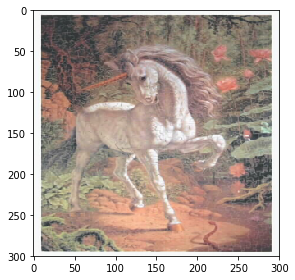

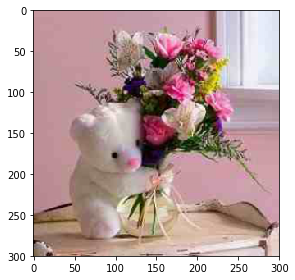

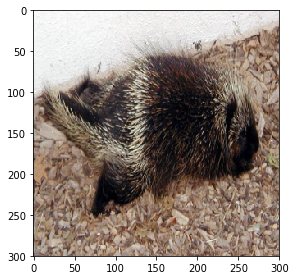

In [10]:
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    io.imshow(((data_from_nb1[data_from_nb1['Encoding'] == i].iloc[0][0])))

Feature 0 does not seem to produce different distributions now that all the sizes are normalized

/Users/arlomalmberg/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/arlomalmberg/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


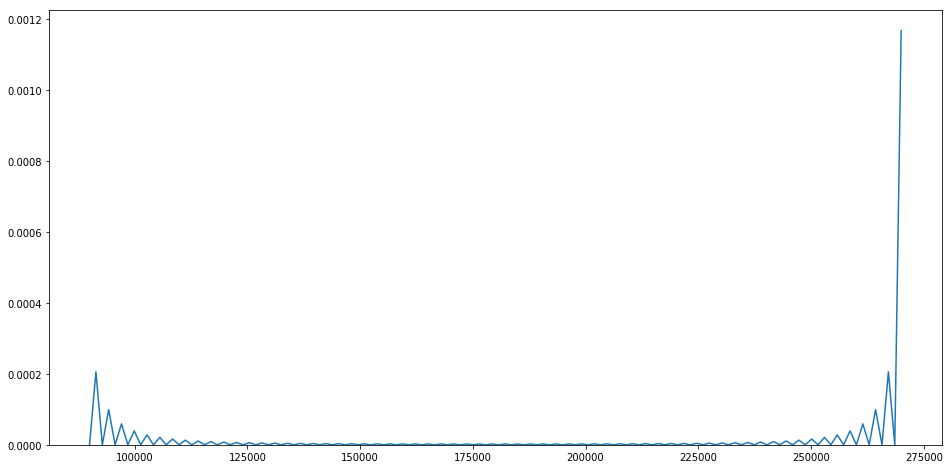

In [11]:
plt.figure(figsize = (16,8))
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    sns.distplot((data_from_nb1[data_from_nb1['Encoding'] == i].apply(lambda x: ft0(x[0]), axis = 1)), hist = False)

Feature 1 seems to produce different distributions

IndexError: ('invalid index to scalar variable.', 'occurred at index 25')

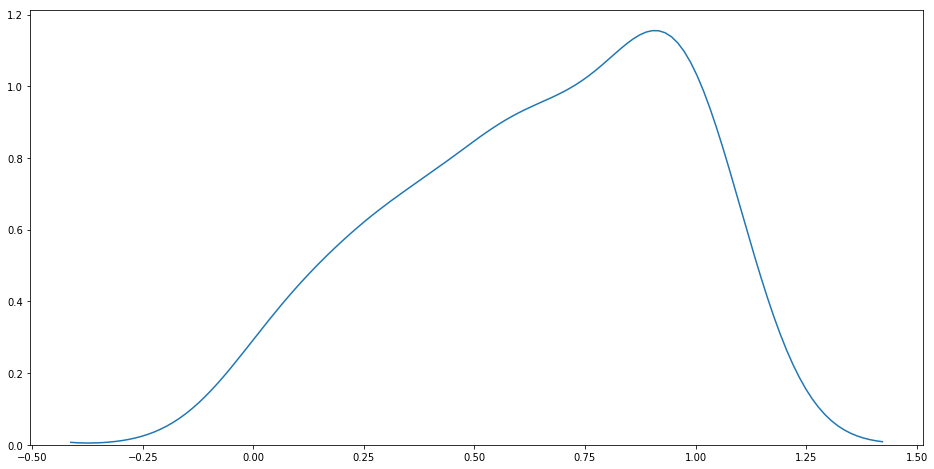

In [15]:
plt.figure(figsize = (16,8))
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    sns.distplot((data_from_nb1[data_from_nb1['Encoding'] == i].apply(lambda x: ft1(x[0]), axis = 1)), hist = False)

Feature 2 seems to produce different distributions

IndexError: ('invalid index to scalar variable.', 'occurred at index 25')

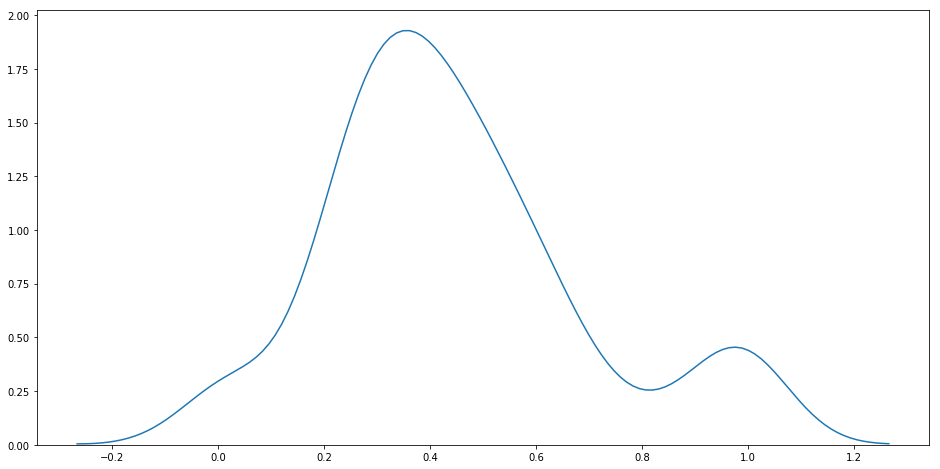

In [17]:
plt.figure(figsize = (16,8))
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    sns.distplot((data_from_nb1[data_from_nb1['Encoding'] == i].apply(lambda x: ft2(x[0]), axis = 1)), hist = False)

Feature 3 seems to produce different distributions

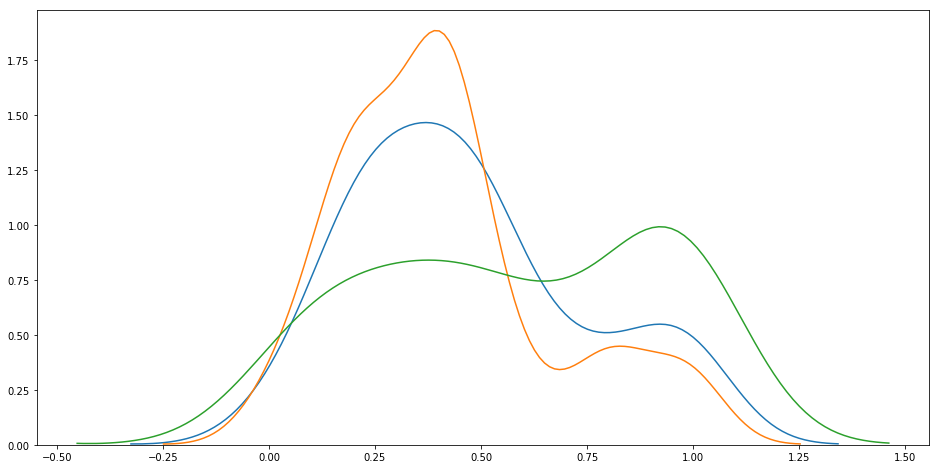

In [20]:
plt.figure(figsize = (16,8))
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    sns.distplot((data_from_nb1[data_from_nb1['Encoding'] == i].apply(lambda x: ft3(x[0]), axis = 1)), hist = False)

Feature 4 does not seem to produce different distributions now that aspect ratios are normalized

In [ ]:
plt.figure(figsize = (16,8))
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    sns.distplot((data_from_nb1[data_from_nb1['Encoding'] == i].apply(lambda x: ft4(x[0]), axis = 1)), hist = False)

Feature 5 seems to produce useful images

In [ ]:
for i in random.choices(data_from_nb1['Encoding'].unique(), k = 3):
    fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    io.imshow(ft5((data_from_nb1[data_from_nb1['Encoding'] == i].iloc[0][0])))

Feature 6 seems to produce useful images

In [ ]:
#Daisy_test = ft6(image_1, visualize = True)

In [ ]:
#io.imshow(Daisy_test[1])

Feature 7 seems to produce useful images

In [ ]:
HOG_test = ft7(image_1, visualize = True)

In [ ]:
io.imshow(HOG_test[1])

<h4> Sources </h4>

Feature Detection and Description: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html

Understanding Features: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning

Good Features: http://alumni.media.mit.edu/~maov/classes/comp_photo_vision08f/lect/18_feature_detectors.pdf

Sci-Kit Image Feature Module: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny

<h4> DataFrame Creation </h4>

In [ ]:
def feature_frame(df):
    df['ft0'] = data_from_nb1.apply(lambda x: ft0(x[0]), axis = 1)
    df['ft1'] = data_from_nb1.apply(lambda x: ft1(x[0]), axis = 1)
    df['ft2'] = data_from_nb1.apply(lambda x: ft2(x[0]), axis = 1)
    df['ft3'] = data_from_nb1.apply(lambda x: ft3(x[0]), axis = 1)
    df['ft4'] = data_from_nb1.apply(lambda x: ft4(x[0]), axis = 1)
    df['ft5'] = data_from_nb1.apply(lambda x: ft5(x[0]), axis = 1)
#    df['ft6'] = data_from_nb1.apply(lambda x: ft6(x[0]), axis = 1)
    df['ft7'] = data_from_nb1.apply(lambda x: ft7(x[0]), axis = 1)
    return df
    #Returns data-frame with all the features now inside, and calculated


In [ ]:
data_from_nb2 = feature_frame(data_from_nb1)

In [ ]:
file_name = '/Users/arlomalmberg/Documents/GSPP/Semester 2/DS100/final_project/nb2_data.pkl'
data_from_nb2.to_pickle(file_name)